<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy; import matplotlib.pyplot as plt; from pandas import read_csv
import math; from keras.models import Sequential; from keras.layers import Dense
from keras.layers import LSTM ; from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error ; # convert an array of values into a dataset matrix

# 시계열 데이터 예측

---
**y**=y(t), **x**=[y(t-1), y[t-2], ... ] 


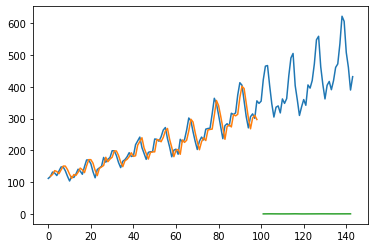

# 데이터를 불러오자

In [106]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('airline.csv', usecols=[1], engine='python')
dataset = dataframe.values; dataset = dataset.astype('float32')
dataframe.head(10)

,passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


# 데이터 스케일을 정규화(optional)

In [107]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset[0:10]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753]], dtype=float32)

# 훈련/ 검증 데이터 분리

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# x = (t-1) 시점의 데이터, y = t 시점의 데이터로 정리

In [109]:
# reshape into X=t and Y=t+1   

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
look_back = 1    
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print('      X=Y(t-1),     Y')
for i in range(5):
  print(i, trainX[i], trainY[i])

      X=Y(t-1),     Y
0 [[0.01544401]] 0.027027026
1 [[0.02702703]] 0.05405405
2 [[0.05405405]] 0.04826255
3 [[0.04826255]] 0.032818526
4 [[0.03281853]] 0.059845567


# 모형설정
시계열 모형에 특화된 LSTM 모형을 사용하자

In [110]:
EPOCH=100; BATCH=1;

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=EPOCH, batch_size=BATCH, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0434
Epoch 2/100
 - 0s - loss: 0.0207
Epoch 3/100
 - 0s - loss: 0.0147
Epoch 4/100
 - 0s - loss: 0.0134
Epoch 5/100
 - 0s - loss: 0.0123
Epoch 6/100
 - 0s - loss: 0.0112
Epoch 7/100
 - 0s - loss: 0.0101
Epoch 8/100
 - 0s - loss: 0.0091
Epoch 9/100
 - 0s - loss: 0.0080
Epoch 10/100
 - 0s - loss: 0.0070
Epoch 11/100
 - 0s - loss: 0.0058
Epoch 12/100
 - 0s - loss: 0.0050
Epoch 13/100
 - 0s - loss: 0.0043
Epoch 14/100
 - 0s - loss: 0.0036
Epoch 15/100
 - 0s - loss: 0.0031
Epoch 16/100
 - 0s - loss: 0.0028
Epoch 17/100
 - 0s - loss: 0.0025
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0023
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0022
Epoch 22/100
 - 0s - loss: 0.0022
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0022
Epoch 25/100
 - 0s - loss: 0.0022
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0022
Epoch 30/100
 - 0s - lo

# 예측성능 시각화

Train Score: 23.52 RMSE
Test Score: 50.05 RMSE
R-squared= 0.43835497816404956


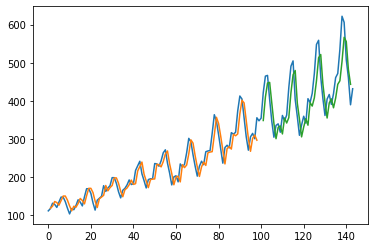

In [111]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions (원래의 스케일을 복원)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import r2_score; import numpy as np
y_test=np.transpose(testY)
r2=r2_score(testPredict,y_test)

print('R-squared=', np.round(r2,3))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()